In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import sbi_stacking.utils as utils
import sbi_stacking.stacking as stacking
import sbi_stacking.simbig as simbig
import sbi_stacking.plots as splt

2023-10-17 01:37:33.169897: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-17 01:37:33.208231: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
version = 'v16.1.1.0'
nb_models = 100

device = "cuda:0"

output_dir = utils.get_output_dir("simbig")

In [3]:
params = {'text.usetex': True,
         'text.latex.preamble': r'\usepackage{amsmath}',
         "font.family": "serif", "font.serif": ["Computer Modern Roman"],
         'font.size': 15}
plt.rcParams.update(params)

In [4]:
ranks = utils.get_stats("simbig", "ranks")
print(ranks.shape)

torch.Size([100, 2000, 14])


In [5]:
opt_weights, stacked_ranks, losses = stacking.stacking_ranks(ranks)

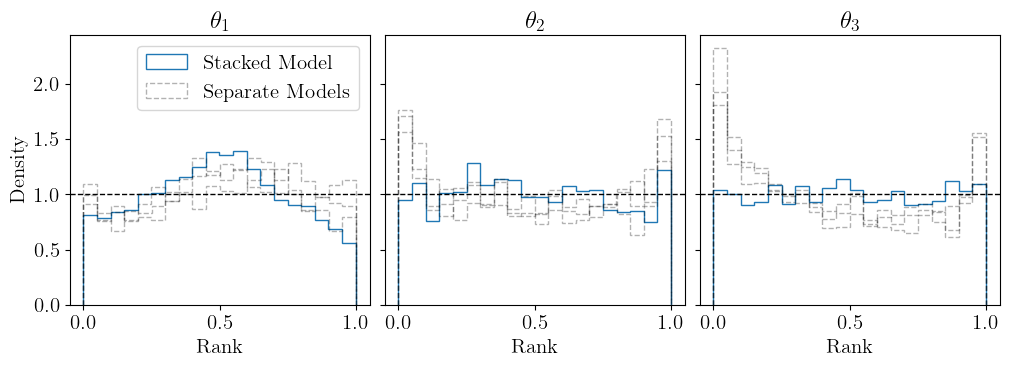

In [ ]:
nb_ind_models = 3
nparams = 3
rand_indices = np.random.choice(nb_models, nb_ind_models, replace=False)
bins = 20
lw = 1
dist_type = 'cvm'

fig, axs = plt.subplots(1, nparams, figsize=(4*nparams, 3.5), sharey=True, sharex=True)
for j in range(nparams):
    axs[j].hist(stacked_ranks[:, j].cpu(), bins=bins, density=True, lw=lw, histtype='step', label='Stacked')
    for i in range(len(rand_indices)):
        axs[j].hist(ranks[i, :, j].cpu(), bins=bins, density=True, lw=lw, histtype='step', color='black', alpha=0.3, linestyle='dashed', label='Separate' if i == 0 else None)
    dist = stacking.distance_to_uniform(stacked_ranks[:, j].cpu(), dist_type=dist_type).item()
    axs[j].axhline(1, color='black', linestyle='dashed', lw=lw)
    # axs[j].text(0.05, 0.95, f"{dist_type} dist to uni = {dist:.4f}", transform=axs[j].transAxes, va='top', ha='left')
    axs[j].set_xlabel("Rank")
    axs[j].set_title(f"$\\theta_{j+1}$")
axs[0].legend()
axs[0].set_ylabel("Density")
plt.subplots_adjust(wspace=0.05)
fig.savefig('figs/simbig_ranks.pdf', bbox_inches='tight')

In [ ]:
nb_ind_models = 3
nparams = 14
rand_indices = np.random.choice(nb_models, nb_ind_models, replace=False)
bins = 20
lw = 1
dist_type = 'cvm'

fig, axs = plt.subplots(1, nparams, figsize=(4*nparams, 3.5), sharey=True, sharex=True)
for j in range(nparams):
    axs[j].hist(stacked_ranks[:, j].cpu(), bins=bins, density=True, lw=lw, histtype='step', label='Stacked')
    for i in range(len(rand_indices)):
        axs[j].hist(ranks[i, :, j].cpu(), bins=bins, density=True, lw=lw, histtype='step', color='black', alpha=0.3, linestyle='dashed', label='Separate' if i == 0 else None)
    dist = stacking.distance_to_uniform(stacked_ranks[:, j].cpu(), dist_type=dist_type).item()
    axs[j].axhline(1, color='black', linestyle='dashed', lw=lw)
    # axs[j].text(0.05, 0.95, f"{dist_type} dist to uni = {dist:.4f}", transform=axs[j].transAxes, va='top', ha='left')
    axs[j].set_xlabel("Rank")
    axs[j].set_title(f"$\\theta_{j+1}$")
axs[0].legend()
axs[0].set_ylabel("Density")
plt.subplots_adjust(wspace=0.05)